In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('female_urban')

In [8]:
data.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4909619797978,326474132970,2f300d84888d398856f18462ca81048d,1651329207,misc_pos,41.03,0,Torres-Davis,30.473613,-89.006731
1,4909619797978,326474132970,0d252e7c0b6274ce60c697780e10e93c,1652121210,misc_pos,66.17,0,Sanchez-Fuentes,29.034377,-89.356216
2,4909619797978,326474132970,69de7889eac55aa065a5f69eb5eb910d,1650120435,misc_net,65.99,0,"Cook, Gordon and Cameron",29.585810,-90.207869
3,4909619797978,326474132970,54bf046b1b57c1bb821625be5873d9f8,1650759278,misc_net,66.69,0,Hall Group,29.813094,-89.504049
4,4909619797978,326474132970,80ca47f8a6cf1c8e0efeeba1a0d18752,1643827462,grocery_net,80.73,0,Dickerson-Macdonald,29.732909,-90.873800


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33295 entries, 0 to 33294
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      33295 non-null  int64  
 1   acct_num    33295 non-null  int64  
 2   trans_num   33295 non-null  object 
 3   unix_time   33295 non-null  int64  
 4   category    33295 non-null  object 
 5   amt         33295 non-null  float64
 6   is_fraud    33295 non-null  int64  
 7   merchant    33295 non-null  object 
 8   merch_lat   33295 non-null  float64
 9   merch_long  33295 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ MB


In [12]:
data.shape

(33295, 10)

In [14]:
if data.duplicated().sum() > 0:
    print('Duplicates are Present')
else:
    print('No Duplicates exist')

No Duplicates exist


In [16]:
data.isnull().sum()

cc_num        0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [18]:
category = data['category'].unique()
category

array(['misc_pos', 'misc_net', 'grocery_net', 'grocery_pos',
       'gas_transport', 'home', 'personal_care', 'food_dining',
       'shopping_pos', 'kids_pets', 'shopping_net', 'entertainment',
       'health_fitness', 'travel'], dtype=object)

In [20]:
total_category = data['category'].value_counts().reset_index()
total_category.columns = ['Category', 'Total Category']
print(total_category)

          Category  Total Category
0     shopping_pos            3792
1     shopping_net            3273
2      grocery_pos            3250
3             home            3198
4        kids_pets            2854
5    personal_care            2621
6      food_dining            2306
7         misc_pos            2204
8   health_fitness            2152
9    entertainment            2127
10     grocery_net            2103
11        misc_net            1598
12   gas_transport            1064
13          travel             753


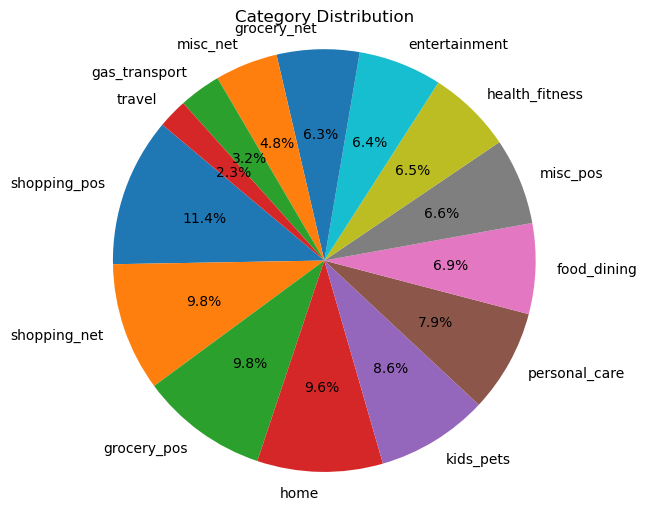

In [35]:
plt.figure(figsize=(6, 6))
plt.pie(total_category['Total Category'], labels=total_category['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.axis('equal')
plt.show()

In [22]:
data.head(5)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4909619797978,326474132970,2f300d84888d398856f18462ca81048d,1651329207,misc_pos,41.03,0,Torres-Davis,30.473613,-89.006731
1,4909619797978,326474132970,0d252e7c0b6274ce60c697780e10e93c,1652121210,misc_pos,66.17,0,Sanchez-Fuentes,29.034377,-89.356216
2,4909619797978,326474132970,69de7889eac55aa065a5f69eb5eb910d,1650120435,misc_net,65.99,0,"Cook, Gordon and Cameron",29.585810,-90.207869
3,4909619797978,326474132970,54bf046b1b57c1bb821625be5873d9f8,1650759278,misc_net,66.69,0,Hall Group,29.813094,-89.504049
4,4909619797978,326474132970,80ca47f8a6cf1c8e0efeeba1a0d18752,1643827462,grocery_net,80.73,0,Dickerson-Macdonald,29.732909,-90.873800


In [24]:
category_total_cost = data.groupby('category')['amt'].sum().reset_index()
category_total_cost.columns = ['Total Category', 'Total Amount']
print(category_total_cost)


    Total Category  Total Amount
0    entertainment     152642.77
1      food_dining     198087.50
2    gas_transport     126581.83
3      grocery_net     243501.61
4      grocery_pos     389616.92
5   health_fitness     166177.74
6             home     236031.65
7        kids_pets     208210.92
8         misc_net     185621.80
9         misc_pos     244849.71
10   personal_care     222120.33
11    shopping_net     241243.82
12    shopping_pos     286397.90
13          travel      57207.16


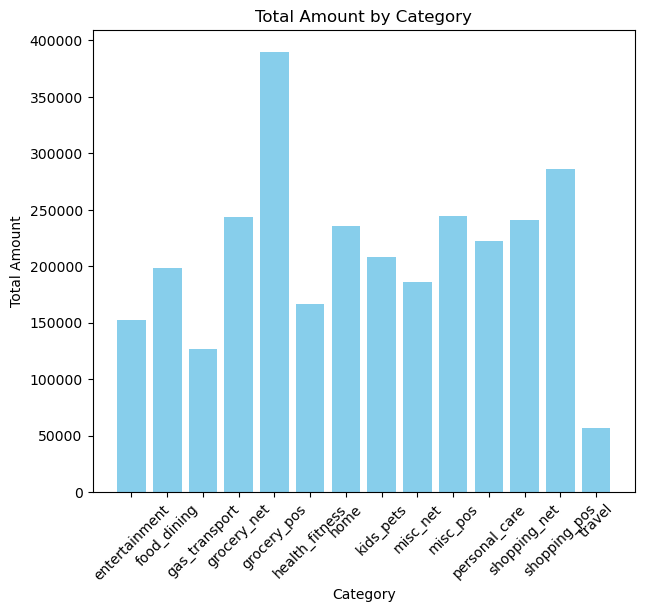

In [26]:
import matplotlib.pyplot as plt

# Plot a bar chart
plt.figure(figsize=(7, 6))
plt.bar(category_total_cost['Total Category'], category_total_cost['Total Amount'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Category')
plt.xticks(rotation=45)  # Rotate x-axis labels if 
plt.show()


In [28]:
category_spenders = data.groupby(['category', 'merchant'])['amt'].sum().reset_index()
top_spenders = category_spenders.sort_values(by='amt', ascending=False)
print(top_spenders.head(10).reset_index(drop=True))


         category                      merchant      amt
0   personal_care  Green, Hamilton and Roberson  9781.31
1   personal_care                 Shea-Marshall  9175.06
2     food_dining                 Rodriguez Ltd  8445.12
3  health_fitness                  Martin-Brown  5666.38
4    shopping_net                     Perry Inc  3920.89
5            home      Gonzalez, Drake and Kemp  3731.46
6   personal_care                 Harper-Vargas  3221.85
7  health_fitness                  Snyder-Smith  3174.59
8     food_dining       Cantu, Woods and Morgan  3169.59
9     grocery_pos                  Williams Inc  2997.49


# Data Split

In [30]:
data.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4909619797978,326474132970,2f300d84888d398856f18462ca81048d,1651329207,misc_pos,41.03,0,Torres-Davis,30.473613,-89.006731
1,4909619797978,326474132970,0d252e7c0b6274ce60c697780e10e93c,1652121210,misc_pos,66.17,0,Sanchez-Fuentes,29.034377,-89.356216
2,4909619797978,326474132970,69de7889eac55aa065a5f69eb5eb910d,1650120435,misc_net,65.99,0,"Cook, Gordon and Cameron",29.585810,-90.207869
3,4909619797978,326474132970,54bf046b1b57c1bb821625be5873d9f8,1650759278,misc_net,66.69,0,Hall Group,29.813094,-89.504049
4,4909619797978,326474132970,80ca47f8a6cf1c8e0efeeba1a0d18752,1643827462,grocery_net,80.73,0,Dickerson-Macdonald,29.732909,-90.873800


In [32]:
x_feature = data.drop(['is_fraud'], axis=1)
x_feature.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,merchant,merch_lat,merch_long
0,4909619797978,326474132970,2f300d84888d398856f18462ca81048d,1651329207,misc_pos,41.03,Torres-Davis,30.473613,-89.006731
1,4909619797978,326474132970,0d252e7c0b6274ce60c697780e10e93c,1652121210,misc_pos,66.17,Sanchez-Fuentes,29.034377,-89.356216
2,4909619797978,326474132970,69de7889eac55aa065a5f69eb5eb910d,1650120435,misc_net,65.99,"Cook, Gordon and Cameron",29.585810,-90.207869
3,4909619797978,326474132970,54bf046b1b57c1bb821625be5873d9f8,1650759278,misc_net,66.69,Hall Group,29.813094,-89.504049
4,4909619797978,326474132970,80ca47f8a6cf1c8e0efeeba1a0d18752,1643827462,grocery_net,80.73,Dickerson-Macdonald,29.732909,-90.873800


In [34]:
y_target = data['is_fraud']
y_target

0        0
1        0
2        0
3        0
4        0
        ..
33290    0
33291    0
33292    0
33293    0
33294    0
Name: is_fraud, Length: 33295, dtype: int64

# Using Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
X_encode = x_feature.apply(LabelEncoder().fit_transform)
X_encode.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,merchant,merch_lat,merch_long
0,6,8,6048,8345,9,3767,13587,2424,25621
1,6,8,1659,9129,9,6008,12038,772,24702
2,6,8,13659,7161,8,5990,2661,1444,22560
3,6,8,10903,7851,8,6056,5139,1715,24345
4,6,8,16724,1684,3,7186,3313,1622,21088


In [43]:
X = X_encode
X.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,merchant,merch_lat,merch_long
0,6,8,6048,8345,9,3767,13587,2424,25621
1,6,8,1659,9129,9,6008,12038,772,24702
2,6,8,13659,7161,8,5990,2661,1444,22560
3,6,8,10903,7851,8,6056,5139,1715,24345
4,6,8,16724,1684,3,7186,3313,1622,21088


In [45]:
y = y_target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

# Train Test Split Data

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape

(26636, 9)

In [54]:
X_test.shape

(6659, 9)

In [56]:
y_train.shape

(26636,)

In [58]:
y_train.shape

(26636,)

# Algorithm Implementation

In [67]:
from sklearn import tree
model = tree.DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [69]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [71]:
y_prediction = model.predict(X_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9991


In [83]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_prediction = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)  # Replace with an appropriate metric if you're using regression
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9991
